In [39]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st
import seaborn as sns

# File to Load (Remember to Change These)
file_to_load = "../datasets/playlist_top_5_output.csv"

file_to_load2 = "../datasets/playlist_top_5_input.csv"

# Read Purchasing File and store into Pandas data frame
playlist_data1 = pd.read_csv(file_to_load)

playlist_data2 = pd.read_csv(file_to_load2)

playlist_data = pd.merge(playlist_data1, playlist_data2, on = "Playlist ID", how = "inner")

playlist_data


,Unnamed: 0,Playlist ID,Track ID,Track Position,Track Name,Track Added At,Track Popularity,Track Duration,Available Markets,Album,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Name,Genre
0,0,37i9dQZF1DXcBWIGoYBM5M,2usxQITOSDqvkYiI0oIwao,1,You should be sad,2020-01-29T19:04:50Z,89,205473,79,You should be sad,...,0.591,0.585,0.000000,0.1090,-6.350,0.0277,0.324,110.940,Today's Top Hits,Pop
1,1,37i9dQZF1DXcBWIGoYBM5M,0nbXyq5TXYPCO7pr3N8S4I,2,The Box,2020-01-29T19:04:50Z,100,196652,78,Please Excuse Me For Being Antisocial,...,0.896,0.586,0.000000,0.7900,-6.687,0.0559,0.642,116.971,Today's Top Hits,Pop
2,2,37i9dQZF1DXcBWIGoYBM5M,2Fxmhks0bxGSBdJ92vM42m,3,bad guy,2020-01-29T19:04:50Z,95,194087,79,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",...,0.701,0.425,0.130000,0.1000,-10.965,0.3750,0.562,135.128,Today's Top Hits,Pop
3,3,37i9dQZF1DXcBWIGoYBM5M,0sf12qNH5qcw8qpgymFOqD,4,Blinding Lights,2020-01-29T19:04:50Z,98,201573,79,Blinding Lights,...,0.513,0.796,0.000209,0.0938,-4.075,0.0629,0.345,171.017,Today's Top Hits,Pop
4,4,37i9dQZF1DXcBWIGoYBM5M,4TnjEaWOeW0eKTKIEvJyCa,5,Falling,2020-01-29T19:04:50Z,98,159381,79,Falling,...,0.784,0.430,0.000000,0.0887,-8.756,0.0364,0.236,127.087,Today's Top Hits,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,4428,37i9dQZF1DXasneILDRM7B,2zb0TZbEprJhFjrbW74cWt,45,Motion Sickness,2020-01-20T10:54:16Z,53,205125,79,The Peace And The Panic,...,0.718,0.691,0.000000,0.0627,-6.440,0.0387,0.552,100.008,Pure Pop Punk,Punk
4429,4429,37i9dQZF1DXasneILDRM7B,1wYJnu1hMrYMNrkXKTVrYd,46,Gives You Hell,2020-01-20T10:54:16Z,8,213106,0,When The World Comes Down,...,0.524,0.921,0.000000,0.1320,-2.417,0.0377,0.703,88.979,Pure Pop Punk,Punk
4430,4430,37i9dQZF1DXasneILDRM7B,6tQofm7cDQwiG32FVF1HAx,47,Right Girl,2020-01-20T10:54:16Z,52,216986,72,Black & White (Deluxe),...,0.528,0.861,0.000000,0.2680,-4.309,0.0518,0.591,95.020,Pure Pop Punk,Punk
4431,4431,37i9dQZF1DXasneILDRM7B,64kDGEpOWlkv2l6x4TVNOs,48,Broken Heart,2020-01-20T10:54:16Z,47,187371,79,Broken Heart,...,0.497,0.923,0.000000,0.0820,-3.040,0.1100,0.545,155.110,Pure Pop Punk,Punk


In [60]:
playlist_grouped_mean = playlist_data.groupby(['Playlist ID']).mean()

In [66]:
name = playlist_data.groupby(['Name']).mean()

In [67]:
name

,Unnamed: 0,Track Position,Track Popularity,Track Duration,Available Markets,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
Name,,,,,,,,,,,,,,,,,
00s Rock Anthems,1215.5,25.500000,65.980000,217739.620000,55.780000,5.880000,0.720000,3.980000,0.013204,0.490200,0.875060,0.010812,0.206222,-4.297460,0.067276,0.554060,139.190980
90's Country,1011.0,29.000000,58.245614,212436.877193,65.543860,5.526316,0.929825,3.982456,0.274098,0.653000,0.673175,0.001717,0.190930,-8.066842,0.035100,0.690684,127.045404
Adrenaline Workout,3943.5,26.500000,45.557692,220752.711538,55.711538,5.115385,0.442308,3.942308,0.001773,0.495000,0.926096,0.031975,0.204415,-4.094308,0.102319,0.373992,120.868519
All New Indie,2556.5,50.500000,50.720000,214522.930000,68.630000,6.000000,0.690000,3.910000,0.304332,0.584510,0.588220,0.134117,0.179063,-7.782060,0.045686,0.476183,117.177180
Are & Be,2303.5,22.285714,68.880952,209084.190476,69.833333,4.833333,0.428571,3.976190,0.309055,0.640786,0.567381,0.004856,0.137757,-6.978762,0.146174,0.451619,111.658214
Bachata Lovers,1690.5,50.500000,50.700000,233998.480000,68.150000,5.250000,0.400000,4.000000,0.383077,0.792190,0.703720,0.003212,0.166574,-5.563040,0.041818,0.829530,128.699690
Baila Reggaeton,1515.5,25.500000,76.820000,224468.240000,72.660000,4.740000,0.600000,4.020000,0.181004,0.767100,0.732680,0.000774,0.161826,-4.431060,0.133136,0.680500,127.877940
Best of Folk & Americana 2010s,3077.5,50.500000,53.070000,231490.650000,58.490000,4.940000,0.830000,3.880000,0.584668,0.520890,0.431912,0.064527,0.151161,-10.030160,0.045770,0.384949,112.231320
Best of Folk & Americana 2019,3002.5,25.500000,48.080000,233229.220000,73.300000,5.300000,0.760000,3.880000,0.587800,0.518700,0.438260,0.072315,0.119068,-9.326580,0.034404,0.385120,114.408780


In [62]:
playlist_grouped_count = playlist_data.groupby(['Playlist ID']).count()

In [63]:
playlist_grouped_count

,Unnamed: 0,Track ID,Track Position,Track Name,Track Added At,Track Popularity,Track Duration,Available Markets,Album,Album Type,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Name,Genre,Playlist position
Playlist ID,,,,,,,,,,,,,,,,,,,,,
37i9dQZF1DWSf2RDTDayIx,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,25
37i9dQZF1DWSpF87bP6JSF,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,25
37i9dQZF1DWT2jS7NwYPVI,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,25
37i9dQZF1DWTR4ZOXTfd9K,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,25
37i9dQZF1DWTcqUzwhNmKv,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,25
37i9dQZF1DWTkxQvqMy4WW,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,25
37i9dQZF1DWTyjRnMgESue,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,25
37i9dQZF1DWUa8ZRTfalHk,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,25
37i9dQZF1DWVcbzTgVpNRm,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,25


In [61]:
playlist_grouped_mean

,Unnamed: 0,Track Position,Track Popularity,Track Duration,Available Markets,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
Playlist ID,,,,,,,,,,,,,,,,,
37i9dQZF1DWSf2RDTDayIx,2142.5,40.500000,52.012500,194526.187500,63.575000,5.025000,0.750000,3.987500,0.076796,0.624162,0.839187,0.110736,0.253312,-4.938575,0.064771,0.435468,123.980050
37i9dQZF1DWSpF87bP6JSF,1790.5,50.500000,77.000000,220184.300000,76.180000,5.520000,0.730000,4.000000,0.268969,0.709060,0.664440,0.000920,0.167881,-5.355620,0.099259,0.659910,126.887140
37i9dQZF1DWT2jS7NwYPVI,1140.5,50.500000,43.840000,200778.390000,72.700000,4.880000,0.600000,3.960000,0.048458,0.513770,0.796670,0.037678,0.211865,-5.203840,0.068208,0.490379,127.318790
37i9dQZF1DWTR4ZOXTfd9K,3717.5,40.500000,43.600000,377137.312500,72.262500,5.312500,0.512500,3.900000,0.678895,0.532438,0.405950,0.369681,0.163793,-11.746237,0.048481,0.453993,108.582813
37i9dQZF1DWTcqUzwhNmKv,3787.5,30.500000,53.816667,244615.683333,60.933333,5.283333,0.566667,3.850000,0.001609,0.430650,0.935983,0.133912,0.207357,-4.523433,0.113727,0.269917,129.143667
37i9dQZF1DWTkxQvqMy4WW,857.5,25.500000,66.740000,215384.700000,66.480000,6.320000,0.920000,3.980000,0.183917,0.567900,0.732720,0.001033,0.168644,-5.497020,0.045926,0.532760,123.880320
37i9dQZF1DWTyjRnMgESue,3377.5,50.500000,42.160000,223356.520000,67.200000,5.650000,0.880000,3.890000,0.605058,0.525730,0.410185,0.055457,0.136942,-9.952290,0.037744,0.367162,112.951870
37i9dQZF1DWUa8ZRTfalHk,87.0,38.000000,77.773333,197328.053333,73.920000,5.786667,0.600000,3.920000,0.321954,0.678880,0.548183,0.011279,0.147244,-7.071373,0.103960,0.467141,118.398947
37i9dQZF1DWVcbzTgVpNRm,1590.5,50.500000,70.930000,227517.120000,66.420000,6.030000,0.550000,4.000000,0.178760,0.751280,0.777760,0.001932,0.154219,-4.488470,0.100703,0.710910,114.039420


In [40]:
color_dict = dict({'Country': "Pink",
                   'Dance/Electronic': "Crimson",
                   'Folk & Acoustic': "Peachpuff",
                   'Hip Hop': "Orange",
                   'Indie': "skyblue",
                   'Jazz': "dodgerblue",
                   'Latin': "plum",
                   'Metal': "purple",
                   'Pop': "lightgreen",
                   'Punk': "green",
                   'R&B': "lightgoldenrodyellow",
                   'Rock': "yellow"
                  })

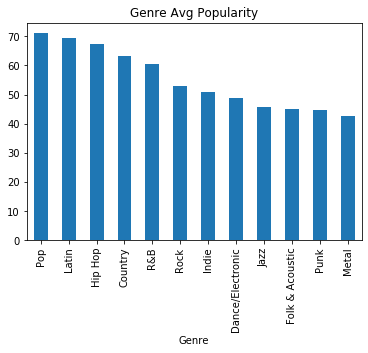

In [41]:
genre_group = playlist_data.groupby(["Genre"])

#genre_list = genre_group["Genre"].tolist()

genre_avg_pop = genre_group["Track Popularity"].mean()
genre_avg_pop = genre_avg_pop.sort_values(ascending = False)


genre_avg_pop.plot(kind= "bar", title = "Genre Avg Popularity")



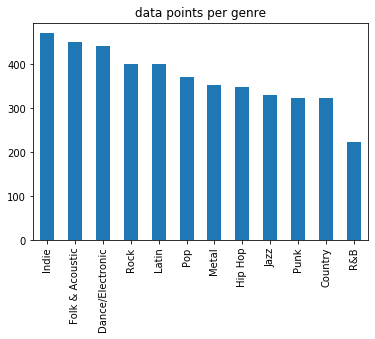

In [42]:
#Album type

type_count = playlist_data["Genre"].value_counts()

type_count.plot(kind= "bar", title="data points per genre")


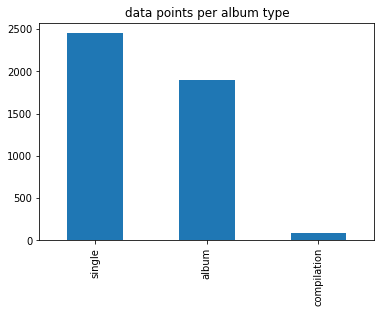

In [43]:
#Album type

type_count = playlist_data["Album Type"].value_counts()

type_count.plot(kind= "bar", title="data points per album type")


             Avg Score
Album Type            
album        55.703158
single       54.213469
compilation  50.493976


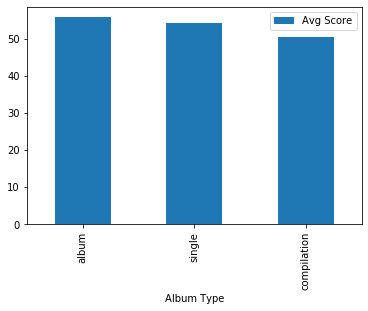

In [44]:
# group by album
type_group = playlist_data.groupby(["Album Type"])

avg_pop = type_group["Track Popularity"].mean()

avg_pop = avg_pop.sort_values(ascending = False)

type_avg = pd.DataFrame({"Avg Score": avg_pop})

print(type_avg)


#Create AVG Pop score Graph

type_avg.plot(kind="bar")

In [78]:
# Amongst the top 25 songs within a playlist, how much variance is there in the Audio Features?

bins = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

#Bin labels

group_names = ["1", "2", "3", "4", "5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25"]


#Add column

playlist_data["Playlist position"] = pd.cut(playlist_data["Track Position"], bins, labels=group_names)


position_data = playlist_data.dropna()


#position_group= position_data.groupby("Playlist position")

position_table = position_data[["Track Position", "Track Duration", "Acousticness", "Danceability", "Energy", 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Tempo']]

# position_table= position_table.reset_index().drop('Index')

position_table = position_table.reset_index().drop('index',1)
position_table.head(50)

duration = position_table.groupby(["Track Position"]).mean()

duration

,Track Duration,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
Track Position,,,,,,,,,,
1,228495.051724,0.275437,0.595466,0.667729,0.099118,0.163622,-6.801052,0.118852,0.498948,120.907983
2,225327.711864,0.275800,0.603695,0.645046,0.090355,0.182193,-7.477186,0.092280,0.504653,116.817814
3,218306.084746,0.247590,0.630000,0.661407,0.070477,0.181364,-6.684203,0.098369,0.514685,116.131814
4,217257.116667,0.258334,0.594217,0.666308,0.076481,0.167958,-7.041633,0.083405,0.473985,123.418233
5,221362.483333,0.274512,0.585817,0.657192,0.077287,0.167513,-6.854900,0.091200,0.464313,123.672167
6,212334.333333,0.251929,0.593350,0.685232,0.081501,0.195445,-6.591483,0.088587,0.536585,119.380650
7,228231.533333,0.245942,0.617867,0.657962,0.036929,0.156343,-7.247100,0.106448,0.509117,121.169750
8,227396.750000,0.264491,0.625000,0.634050,0.079330,0.170368,-7.023683,0.093468,0.488535,123.097217
9,218221.933333,0.222509,0.598883,0.646378,0.086019,0.211540,-7.059917,0.089693,0.499407,123.231350


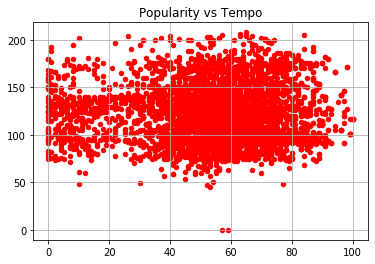

In [37]:
# Popularity Vs Valence
playlist_data["Track Popularity"].astype(int)

playlist_data.plot(kind='scatter', x='Track Popularity', y='Tempo', c='Red')
plt.title('Popularity vs Tempo')
plt.xlabel('')
plt.ylabel('')
plt.grid()